# The Birthday Paradox: Understanding Probability and Combinatorics
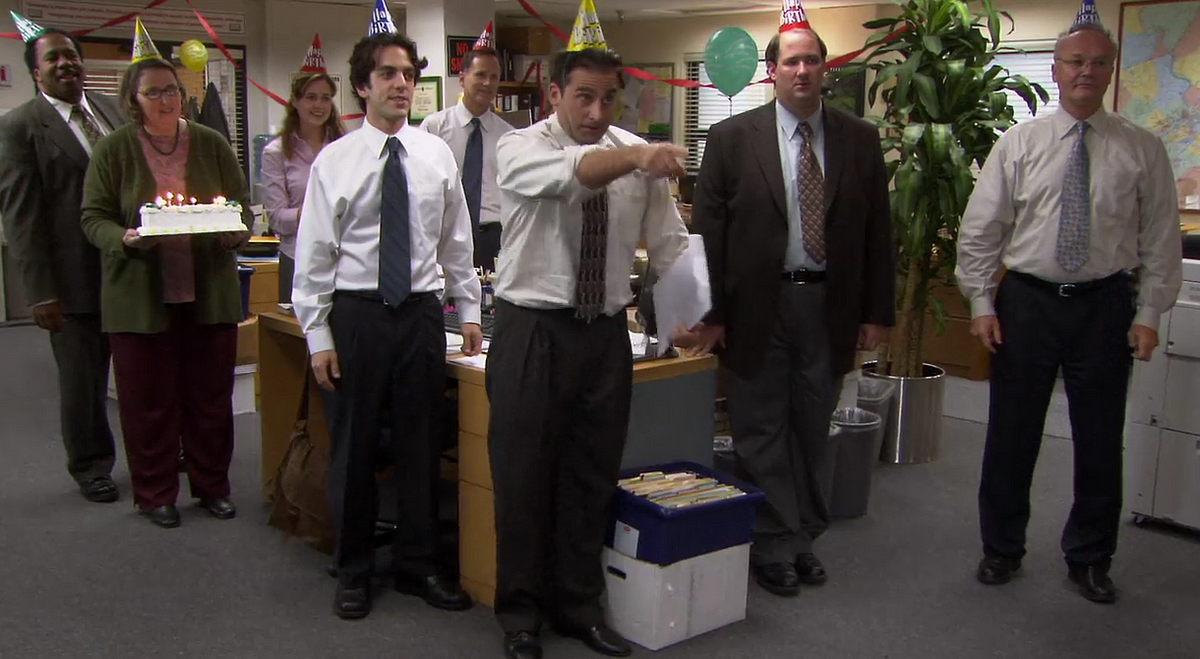

> The Birthday Paradox teaches that probability can be deceptive, especially in combinatorial contexts: even in small groups, there’s a high chance of shared birthdays due to the rapid growth in possible pairs

The Birthday Paradox is a famous problem in probability theory that reveals an unintuitive result: in a group of just 23 people, there is a greater than 50% chance that at least two people share the same birthday. This counterintuitive outcome arises from combinatorial probability and is a great example of how our intuitions about probability can often be misleading.

**Objective**: In this project, we will explore the Birthday Paradox from both probabilistic and combinatorial perspectives. We’ll derive the theoretical probabilities, simulate the experiment, and discuss the implications of this surprising result.

**Key Question**: How many people need to be in a group before it becomes more likely than not that at least two people share the same birthday?

---

# Probability Theory and Derivation of the Birthday Paradox

To understand why the probability of a shared birthday increases so quickly, let’s break down the problem into steps.

1. **Assumptions**:
   - There are 365 possible birthdays (ignoring leap years).
   - Each person's birthday is independent and equally likely to be any of the 365 days.

2. **Calculating the Probability of No Shared Birthdays**:
   - For $ n $ people, we start by calculating the probability that no two people share a birthday.
   - If the first person can have any birthday, the probability that the second person has a different birthday is $\frac{364}{365}$, the third person has $\frac{363}{365}$, and so on.

3. **General Formula**:
   - The probability $ P(\text{no shared birthdays}) $ for a group of $ n $ people is given by:
   
   $
   P(\text{no shared birthdays}) = \frac{365 \times 364 \times 363 \times \ldots \times (365 - n + 1)}{365^n}
   $
   
   - This can also be simplified to a product form:
   
   $
   P(\text{no shared birthdays}) = \prod_{k=0}^{n-1} \frac{365 - k}{365}
   $

4. **Probability of At Least One Shared Birthday**:
   - The probability that **at least one pair** shares a birthday is the complement:
   
   $
   P(\text{at least one shared birthday}) = 1 - P(\text{no shared birthdays})
   $

With this formula, we can calculate the probability for different group sizes and observe how it quickly approaches 1 as $ n $ increases.


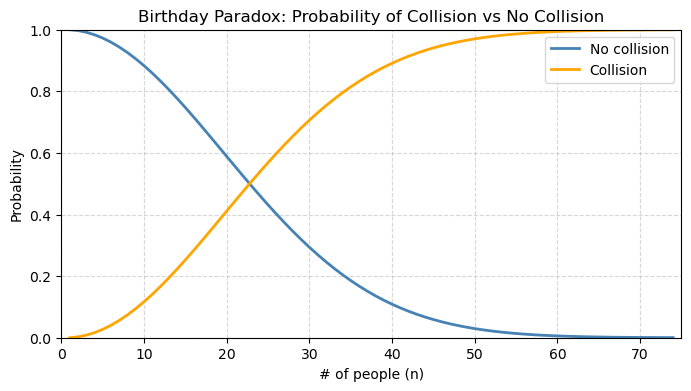

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def probability_no_shared_birthday(n):
    """Calculate the probability of no shared birthdays for a group of n people."""
    prob_no_shared = 1.0
    for k in range(n):
        prob_no_shared *= (365 - k) / 365
    return prob_no_shared

# Generate probabilities for different group sizes
group_sizes = range(1, 75)
no_collision_probabilities = [probability_no_shared_birthday(n) for n in group_sizes]
collision_probabilities = [1 - prob for prob in no_collision_probabilities]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(group_sizes, no_collision_probabilities, label="No collision", color="steelblue", linewidth=2)
plt.plot(group_sizes, collision_probabilities, label="Collision", color="orange", linewidth=2)
plt.xlabel("# of people (n)")
plt.ylabel("Probability")
plt.title("Birthday Paradox: Probability of Collision vs No Collision")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 75)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Interpretation

The plot shows the probability of a "collision" (at least one shared birthday) versus "no collision" (all unique birthdays) as group size increases. 

Initially, the probability of unique birthdays (blue line) is high, but it declines sharply as the group grows, while the probability of a shared birthday (orange line) rises quickly. 
Remarkably, at around 23 people, the probability of a shared birthday surpasses 50%, illustrating the surprising nature of the Birthday Paradox: in a relatively small group, it's more likely than not that two people share the same birthday. 

This counterintuitive result occurs because the number of possible pairs grows rapidly with group size, increasing the chance of a match. For data scientists, the Birthday Paradox serves as a reminder of how combinatorial effects can lead to unexpected outcomes, highlighting the need to complement intuition with formal probabilistic reasoning.


# Combinatorial Explanation of the Birthday Paradox

The Birthday Paradox is often surprising because we don’t naturally think about the number of **pairs** that can be formed in a group.

1. **Counting Pairs**:
   - In a group of $n $ people, the number of possible pairs is given by the combinatorial formula:
   
   $
   \binom{n}{2} = \frac{n(n - 1)}{2}
   $

2. **Example for $ n = 23 $**:
   - For 23 people, there are $ \binom{23}{2} = 253 $ possible pairs. Even though each individual has a 1/365 chance of matching another’s birthday, the sheer number of pairs makes it likely that at least one of them will match.

3. **Implication**:
   - This combinatorial growth in the number of pairs explains why the probability of shared birthdays rises so rapidly. It’s not just about the probability of each individual having a unique birthday but about the probability across all possible pairs.

# Conclusion

The Birthday Paradox reveals the counterintuitive nature of probability: even in small groups, there’s a high chance of shared birthdays due to the rapid growth in possible pairs. 

This insight is valuable for various data science applications:

- **Deduplication and Record Linkage**: In datasets with many records, the likelihood of accidental duplicates or similar entries (like names, emails, or IDs) grows, making it essential to apply probabilistic matching to identify duplicates accurately.

- **Anomaly Detection**: In fraud detection or cybersecurity, recognizing patterns that recur across large datasets helps identify anomalies, as the chance of specific combinations reappearing by random chance increases with dataset size.

- **Feature Hashing in NLP**: In natural language processing, hashing techniques are used to manage high-dimensional data, but hashing can cause "collisions" (different words mapping to the same value). Understanding collision probabilities helps in setting appropriate hash sizes.

- **Clustering and Similarity Matching**: When clustering similar items or finding nearest neighbors in large datasets, the Birthday Paradox reminds us that the chance of close matches is higher than it might intuitively seem, which can inform threshold settings for similarity measures.

The Birthday Paradox teaches that combinatorial effects can produce surprising results, an important lesson for data scientists who work with large datasets and must account for unexpected patterns. By leveraging these insights, we can improve model accuracy, detect anomalies, and manage data efficiently.


# Technical Appendix

## Mathematical Derivation of the Birthday Paradox Probability

### Probability of No Shared Birthdays

For a group of $n$ people, the probability that each person has a unique birthday can be calculated as follows:

1. The first person can have any of the 365 days.
2. The second person has 364 choices to avoid matching the first.
3. The third person has 363 choices, and so on.

This leads to the following formula for the probability of **no shared birthdays**:

$ P(\text{no shared birthdays}) = \frac{365 \times 364 \times 363 \times \ldots \times (365 - n + 1)}{365^n} $

### Simplified Product Form

We can also express this probability in a more concise form as a product:

$ P(\text{no shared birthdays}) = \prod_{k=0}^{n-1} \frac{365 - k}{365} $

### Probability of At Least One Shared Birthday

The probability of at least one shared birthday is the complement of the probability of no shared birthdays:

$ P(\text{at least one shared birthday}) = 1 - P(\text{no shared birthdays}) $

### Growth in Number of Pairs

The number of unique pairs in a group of $n$ people, which explains why the probability of matching rises so quickly, is given by the combination formula:

$ \binom{n}{2} = \frac{n(n - 1)}{2} $

For $n = 23$, this results in 253 pairs, illustrating the high probability of at least one match even in a relatively small group.
